<h1><center>An analysis on how external factors influence football games</center></h1>

This notebook presents an exploratory data analysis to detail the impact that external factors such as crowd attendance,  the match referee or kick off time have on football games. We are going to determine if the home team has any real advantage and if they play more aggressively in comparison to the away team. In the football world there is also a myth circuling around that the surprise results tend to happen at an earlier kick off time. We intend to put this to the test. Furthermore we are going to try to determine if referees have a bias towards certain teams.

### Getting the Data

In order to get the data required we looked at the following websites: 
* https://www.transfermarkt.co.uk/ 
* http://www.football-data.co.uk/
* https://www.footballcritic.com/
* https://www.worldfootball.net/

From http://www.football-data.co.uk/ we downloaded the .csv files which contain the following statistics about football teams and data around the matches that took place in the the premier league seasons 2020-2021, 2019-2020, 2018-2019.<br>The data found on this site also contains betting odds, which we are not going to look at for our current project.

|Abbreviation|Actual Name|Definition|
|:------------:|:-----------:|:----------:|
|Div|Division|League Division where the match was played|
|Date|Date|Day/Month/Year when the match was played|
|Time|Time|Time of match kick off|
|HomeTeam|Home Team|The team which is playing at home|
|AwayTeam|Away Team|The team which is playing away|
|FTHG|Full Time Home Team Goals|Goals scored after full time by the home team|
|FTAG|Full Time Away Team Goals|Goals scored after full time by the away team|
|FTR|Full Time Result|Result after full time(H=Home Win, D=Draw, A=Away Win)|
|HTHG|Half Time Home Team Goals|Goals scored after half time by the home team|
|HTAG|Half Time Away Team Goals|Goals scored after half time by the away team|
|HTR|Half Time Result|Result after half time(H=Home Win, D=Draw, A=Away Win)|
|Referee|Referee|Name of the referee|
|HS|Home Team Shots|Number of shots by the home team|
|AS|Away Team Shots|Number of shots by the away team|
|HST|Home Team Shots on Target|Number of shots on target by the home team|
|AST|Away Team Shots on Target|Number of shots on target by the away team|
|HF|Home Team Fouls Committed|Number of fouls committed by the home team|
|AF|Away Team Fouls Committed|Number of fouls committed by the away team|
|HC|Home Team Corners|Number of corners for the home team|
|AC|Away Team Corners|Number of corners for the away team|
|HY|Home Team Yellow Cards|Number of yellow cards for the home team|
|AY|Away Team Yellow Cards|Number of yellow cards for the away team|
|HR|Home Team Red Cards|Number of red cards for the home team|
|AR|Away Team Red Cards|Number of red cards for the away team|

In [3]:
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%reload_ext autoreload
%autoreload 2
import random

In [5]:
df_prem_2021 = pd.read_csv("data/PremierLeague/PremierLeague_2021.csv")
df_prem_2021.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0,0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57,6.16,4.51,1.56,6.50,4.2,1.53,6.50,4.20,1.55,6.55,4.55,1.60,5.94,4.34,1.55,1.72,2.10,1.80,2.13,1.84,2.18,1.76,2.10,1.00,1.93,1.97,1.96,1.96,2.00,1.99,1.93,1.95,5.00,4.00,1.66,5.50,4.00,1.62,5.25,3.90,1.67,5.48,3.98,1.69,5.50,3.8,1.65,5.50,3.90,1.67,5.75,4.20,1.71,5.36,3.93,1.67,2.0,1.80,2.06,1.86,2.10,1.92,2.00,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0,0,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40,3.32,3.29,2.40,3.20,3.2,2.35,3.20,3.20,2.40,3.36,3.36,2.50,3.18,3.22,2.39,2.20,1.66,2.34,1.68,2.36,1.73,2.24,1.67,0.25,1.85,2.05,1.88,2.05,1.88,2.07,1.84,2.03,3.00,3.25,2.40,3.00,3.30,2.40,3.05,2.90,2.45,3.09,3.27,2.54,3.10,3.1,2.45,3.10,3.25,2.45,3.25,3.33,2.55,3.08,3.22,2.47,2.2,1.66,2.26,1.72,2.27,1.78,2.18,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0,0,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50,1.31,6.25,9.92,1.27,6.0,10.00,1.30,5.75,10.50,1.35,6.50,10.75,1.30,5.96,9.68,1.53,2.50,1.56,2.60,1.56,2.68,1.52,2.53,-1.50,1.95,1.95,1.97,1.95,2.00,2.08,1.90,1.97,1.25,6.00,11.00,1.25,6.25,11.00,1.30,6.00,9.00,1.28,6.34,11.38,1.25,6.0,12.00,1.29,6.00,11.50,1.30,6.75,12.27,1.28,6.16,10.63,1.5,2.62,1.51,2.76,1.53,2.82,1.50,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0,0,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40,2.18,3.61,3.50,2.15,3.5,3.40,2.15,3.40,3.60,2.24,3.70,3.60,2.15,3.48,3.42,1.90,1.90,2.00,1.91,2.05,1.95,1.97,1.86,-0.50,2.07,1.72,2.17,1.78,2.17,1.81,2.12,1.75,1.95,3.60,3.75,1.95,3.70,3.75,2.05,3.25,3.75,2.04,3.59,3.92,2.00,3.5,3.80,2.00,3.50,3.90,2.07,3.78,3.99,2.01,3.57,3.79,1.9,1.90,2.00,1.92,2.00,2.05,1.91,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0,0,3.80,3.60,1.95,3.70,3.60,2.00,3.85,3.20,2.00,4.00,3.59,2.00,3.80,3.6,1.95,4.00,3.50,1.95,4.00,3.82,2.04,3.87,3.57,1.97,1.90,1.90,2.00,1.91,2.02,2.03,1.92,1.90,0.50,1.91,1.99,1.92,2.00,1.93,2.02,1.88,1.97,3.25,3.40,2.20,3.30,3.40,2.20,3.35,3.00,2.30,3.38,3.38,2.32,3.30,3.3,2.25,3.30,3.30,2.30,3.55,3.50,2.38,3.32,3.33,2.28,2.2,1.66,2.23,1.74,2.28,1.82,2.15,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [6]:
df_prem_1920 = pd.read_csv("data/PremierLeague/PremierLeague_1920.csv")
df_prem_1920.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0,1.14,10.00,19.00,1.14,8.25,18.50,1.15,8.00,18.00,1.15,9.59,18.05,1.12,8.5,21.00,1.14,9.5,23.00,1.16,10.00,23.00,1.14,8.75,19.83,1.40,3.00,1.40,3.11,1.45,3.11,1.41,2.92,-2.25,1.96,1.94,1.97,1.95,1.97,2.00,1.94,1.94,1.14,9.50,21.00,1.14,9.0,20.00,1.15,8.00,18.00,1.14,10.43,19.63,1.11,9.5,21.00,1.14,9.50,23.00,1.16,10.50,23.00,1.14,9.52,19.18,1.3,3.50,1.34,3.44,1.36,3.76,1.32,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,M Dean,5,14,3,9,6,13,1,1,2,2,0,0,12.00,6.50,1.22,11.50,5.75,1.26,11.00,6.10,1.25,11.68,6.53,1.26,13.00,6.0,1.24,12.00,6.5,1.25,13.00,6.75,1.29,11.84,6.28,1.25,1.44,2.75,1.49,2.77,1.51,2.77,1.48,2.65,1.75,2.00,1.90,2.02,1.90,2.02,1.92,1.99,1.89,12.00,7.00,1.25,11.00,6.0,1.26,11.00,6.10,1.25,11.11,6.68,1.27,11.00,6.5,1.24,12.00,6.50,1.25,13.00,7.00,1.29,11.14,6.46,1.26,1.4,3.00,1.43,3.03,1.50,3.22,1.41,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0,1.95,3.60,3.60,1.95,3.60,3.90,1.97,3.55,3.80,2.04,3.57,3.90,2.00,3.5,3.80,2.00,3.6,4.00,2.06,3.65,4.00,2.01,3.53,3.83,1.90,1.90,1.96,1.96,2.00,1.99,1.90,1.93,-0.50,2.01,1.89,2.04,1.88,2.04,1.91,2.00,1.88,1.95,3.70,4.20,1.95,3.6,3.90,1.97,3.55,3.85,1.98,3.67,4.06,1.95,3.6,3.90,2.00,3.60,4.00,2.03,3.70,4.20,1.98,3.58,3.96,1.9,1.90,1.94,1.97,1.97,1.98,1.91,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,11,4,3,6,12,2,7,0,0,0,0,2.62,3.20,2.75,2.65,3.20,2.75,2.65,3.20,2.75,2.71,3.31,2.81,2.70,3.2,2.75,2.70,3.3,2.80,2.80,3.33,2.85,2.68,3.22,2.78,2.10,1.72,2.17,1.77,2.20,1.78,2.12,1.73,0.00,1.92,1.98,1.93,2.00,1.94,2.00,1.91,1.98,2.70,3.25,2.90,2.65,3.1,2.85,2.60,3.20,2.85,2.71,3.19,2.90,2.62,3.2,2.80,2.70,3.25,2.90,2.72,3.26,2.95,2.65,3.18,2.88,2.1,1.72,2.19,1.76,2.25,1.78,2.17,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,10,2,3,16,14,6,2,2,1,0,1,3.00,3.25,2.37,3.20,3.20,2.35,3.10,3.20,2.40,3.21,3.37,2.39,3.10,3.3,2.35,3.20,3.3,2.45,3.21,3.40,2.52,3.13,3.27,2.40,2.20,1.66,2.23,1.74,2.25,1.74,2.18,1.70,0.25,1.85,2.05,1.88,2.05,1.88,2.09,1.84,2.04,3.40,3.50,2.25,3.30,3.3,2.25,3.40,3.30,2.20,3.37,3.45,2.27,3.30,3.3,2.25,3.40,3.30,2.25,3.55,3.50,2.34,3.41,3.37,2.23,2.2,1.66,2.22,1.74,2.28,1.77,2.17,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [7]:
df_prem_1819 = pd.read_csv("data/PremierLeague/PremierLeague_1819.csv")
df_prem_1819.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,1.57,3.9,7.50,1.53,4.0,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.8,6.00,1.57,4.0,7.00,39,1.60,1.56,4.20,3.92,8.05,7.06,38,2.12,2.03,1.85,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,1.90,3.6,4.50,1.90,3.4,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.5,4.00,1.87,3.6,4.75,39,1.93,1.88,3.71,3.53,4.75,4.37,38,2.05,1.98,1.92,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2.50,3.4,3.00,2.45,3.3,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.3,2.80,2.50,3.4,3.00,39,2.60,2.47,3.49,3.35,3.05,2.92,38,2.00,1.95,1.96,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,6.50,4.0,1.61,6.25,3.9,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.9,1.57,6.50,4.0,1.62,38,6.85,6.09,4.07,3.90,1.66,1.61,37,2.05,1.98,1.90,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3.90,3.5,2.04,3.80,3.5,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.2,2.05,3.90,3.4,2.10,39,4.01,3.83,3.57,3.40,2.12,2.05,38,2.10,2.01,1.88,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [8]:
#We do not require the betting odds for our project so we are going to delete those columns

columns_to_keep = [x for x in range(df_prem_2021.shape[1]) if x not in range(24,114)]
df_prem_2021 = df_prem_2021.iloc[:, columns_to_keep]
df_prem_2021.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0,0
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0,0
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0,0
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0,0
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0,0


In [9]:
#We do not require the betting odds for our project so we are going to delete those columns

columns_to_keep = [x for x in range(df_prem_1920.shape[1]) if x not in range(24,114)]
df_prem_1920 = df_prem_1920.iloc[:, columns_to_keep]
df_prem_1920.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,M Dean,5,14,3,9,6,13,1,1,2,2,0,0
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,11,4,3,6,12,2,7,0,0,0,0
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,10,2,3,16,14,6,2,2,1,0,1


In [10]:
#We do not require the betting odds for our project so we are going to delete those columns

columns_to_keep = [x for x in range(df_prem_1819.shape[1]) if x not in range(23,114)]
df_prem_1819 = df_prem_1819.iloc[:, columns_to_keep]
df_prem_1819.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0


In [11]:
#Checking for null values

df_prem_2021[df_prem_2021.isna().T.any()]

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


In [12]:
#Checking for null values

df_prem_1920[df_prem_2021.isna().T.any()]

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


In [13]:
#Checking for null values

df_prem_1819[df_prem_2021.isna().T.any()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


In [14]:
#Checking if there are 380 entries, as there are 380 games in a season
df_prem_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       380 non-null    object
 1   Date      380 non-null    object
 2   Time      380 non-null    object
 3   HomeTeam  380 non-null    object
 4   AwayTeam  380 non-null    object
 5   FTHG      380 non-null    int64 
 6   FTAG      380 non-null    int64 
 7   FTR       380 non-null    object
 8   HTHG      380 non-null    int64 
 9   HTAG      380 non-null    int64 
 10  HTR       380 non-null    object
 11  Referee   380 non-null    object
 12  HS        380 non-null    int64 
 13  AS        380 non-null    int64 
 14  HST       380 non-null    int64 
 15  AST       380 non-null    int64 
 16  HF        380 non-null    int64 
 17  AF        380 non-null    int64 
 18  HC        380 non-null    int64 
 19  AC        380 non-null    int64 
 20  HY        380 non-null    int64 
 21  AY        380 no

In [15]:
#Checking if there are 380 entries, as there are 380 games in a season
df_prem_1920.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       380 non-null    object
 1   Date      380 non-null    object
 2   Time      380 non-null    object
 3   HomeTeam  380 non-null    object
 4   AwayTeam  380 non-null    object
 5   FTHG      380 non-null    int64 
 6   FTAG      380 non-null    int64 
 7   FTR       380 non-null    object
 8   HTHG      380 non-null    int64 
 9   HTAG      380 non-null    int64 
 10  HTR       380 non-null    object
 11  Referee   380 non-null    object
 12  HS        380 non-null    int64 
 13  AS        380 non-null    int64 
 14  HST       380 non-null    int64 
 15  AST       380 non-null    int64 
 16  HF        380 non-null    int64 
 17  AF        380 non-null    int64 
 18  HC        380 non-null    int64 
 19  AC        380 non-null    int64 
 20  HY        380 non-null    int64 
 21  AY        380 no

In [16]:
#Checking if there are 380 entries, as there are 380 games in a season
df_prem_1819.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       380 non-null    object
 1   Date      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
 17  HC        380 non-null    int64 
 18  AC        380 non-null    int64 
 19  HY        380 non-null    int64 
 20  AY        380 non-null    int64 
 21  HR        380 no

## Saving the data

In [ ]:
#########

In [ ]:
#########

In [116]:
#########

## Analysing the data

In [17]:
df_prem_2021['Referee'].unique().size

20

In [18]:
df_prem_2021['Referee'].value_counts()

M Oliver      28
A Taylor      28
M Atkinson    26
M Dean        25
K Friend      25
A Marriner    25
J Moss        24
C Pawson      23
S Attwell     23
C Kavanagh    22
P Tierney     21
D Coote       21
A Madley      16
P Bankes      16
G Scott       13
S Hooper      12
D England     11
L Mason       11
R Jones        9
A Moss         1
Name: Referee, dtype: int64

In [19]:
names = df_prem_2021['Referee'].unique()
names = sorted(names)
gamesRefed = df_prem_2021['Referee'].value_counts().sort_index(ascending=True).values

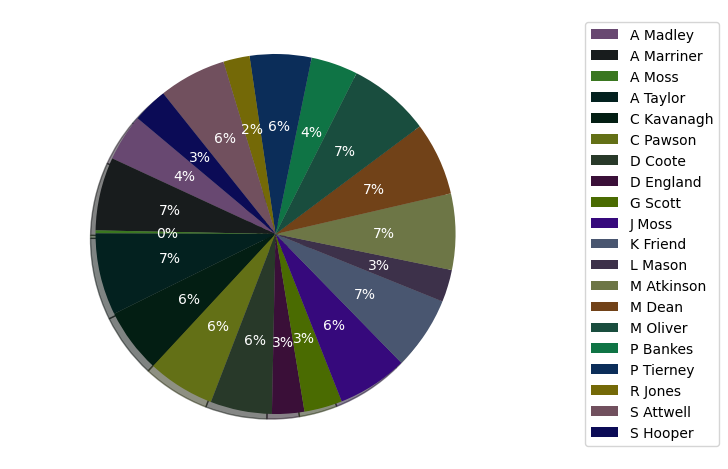

In [20]:
fig_1 = plt.figure(figsize=(8,5),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])

colors = []
for i in range(20):
    rgb = (random.uniform(0, .5), random.uniform(0, .5), random.uniform(0, .5))
    colors.append(rgb)

# Provide values, what to explode and by how much, labels, colors, pct for values,
# whether to shadow, amount to rotate pie, pie text color
wedges, texts, autotexts = plt.pie(gamesRefed, labels=names, colors=colors, 
                                   autopct='%1.0f%%', shadow=True, startangle=140, 
                                   textprops=dict(color="w"))
# Create legend to right and move off pie with 1-1.5 axes point width
plt.legend(wedges, names, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))

In [26]:
#Checking to see if there is a referee, that has refed a team more than usual
df_prem_2021[(df_prem_2021["HomeTeam"]=="Arsenal") | (df_prem_2021["AwayTeam"]=="Arsenal")]['Referee'].value_counts()

M Oliver      5
A Marriner    4
J Moss        4
M Atkinson    4
C Pawson      4
C Kavanagh    3
S Attwell     2
P Tierney     2
A Taylor      2
M Dean        2
P Bankes      2
K Friend      1
L Mason       1
D Coote       1
G Scott       1
Name: Referee, dtype: int64

In [24]:
Dict={}
teams = sorted(df_prem_2021['HomeTeam'].unique())
for team in teams:
    arr = df_prem_2021[(df_prem_2021["HomeTeam"]==team) | (df_prem_2021["AwayTeam"]==team)]['Referee'].value_counts().values
    Dict[team] = arr
    
for item in Dict.items():
    print(item)

('Arsenal', array([5, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1], dtype=int64))
('Aston Villa', array([4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1], dtype=int64))
('Brighton', array([5, 5, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int64))
('Burnley', array([5, 4, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1], dtype=int64))
('Chelsea', array([5, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1], dtype=int64))
('Crystal Palace', array([5, 4, 4, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int64))
('Everton', array([4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1], dtype=int64))
('Fulham', array([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1], dtype=int64))
('Leeds', array([5, 5, 4, 4, 4, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1], dtype=int64))
('Leicester', array([5, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int64))
('Liverpool', array([5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 2], dtype=int64))
('Man City', array([5, 5, 5, 4, 4, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int64))
('Man Unite

In [27]:
#Checking to see the ratio of Home vs Away wins for each team
#Home wins for arsenal
len(df_prem_2021[(df_prem_2021["HomeTeam"]=="Arsenal") & (df_prem_2021["FTR"]=="H")].index)

8

In [28]:
#Away wins for arsenal
len(df_prem_2021[(df_prem_2021["AwayTeam"]=="Arsenal") & (df_prem_2021["FTR"]=="A")].index)

10

In [29]:
#home draws for arsenal
len(df_prem_2021[(df_prem_2021["HomeTeam"]=="Arsenal") & (df_prem_2021["FTR"]=="D")].index)

4

In [30]:
#away draws for arsenal
len(df_prem_2021[(df_prem_2021["AwayTeam"]=="Arsenal") & (df_prem_2021["FTR"]=="D")].index)

3

In [31]:
#produce a dictionary with team name-HomeWins,AwayWins,HomeDraws,AwayDraws
#Season 20-21
DictWinsDraws = {}

for team in teams:
    homeWin = len(df_prem_2021[(df_prem_2021["HomeTeam"]==team) & (df_prem_2021["FTR"]=="H")].index)
    awayWin = len(df_prem_2021[(df_prem_2021["AwayTeam"]==team) & (df_prem_2021["FTR"]=="A")].index)
    homeDraw = len(df_prem_2021[(df_prem_2021["HomeTeam"]==team) & (df_prem_2021["FTR"]=="D")].index)
    awayDraw = len(df_prem_2021[(df_prem_2021["AwayTeam"]==team) & (df_prem_2021["FTR"]=="D")].index)
    arr = [homeWin, awayWin, homeDraw, awayDraw]
    DictWinsDraws[team] = arr
        
for item in DictWinsDraws.items():
    print(item)

('Arsenal', [8, 10, 4, 3])
('Aston Villa', [7, 9, 4, 3])
('Brighton', [4, 5, 9, 5])
('Burnley', [4, 6, 6, 3])
('Chelsea', [9, 10, 6, 4])
('Crystal Palace', [6, 6, 5, 3])
('Everton', [6, 11, 4, 4])
('Fulham', [2, 3, 4, 9])
('Leeds', [8, 10, 5, 0])
('Leicester', [9, 11, 1, 5])
('Liverpool', [10, 10, 3, 6])
('Man City', [13, 14, 2, 3])
('Man United', [9, 12, 4, 7])
('Newcastle', [6, 6, 5, 4])
('Sheffield United', [5, 2, 1, 1])
('Southampton', [8, 4, 3, 4])
('Tottenham', [10, 8, 3, 5])
('West Brom', [3, 2, 6, 5])
('West Ham', [10, 9, 4, 4])
('Wolves', [7, 5, 4, 5])


In [32]:
#produce a dictionary with team name-HomeWins,AwayWins,HomeDraws,AwayDraws
#Season 19-20
teams = sorted(df_prem_1920['HomeTeam'].unique())
DictWinsDraws = {}

for team in teams:
    homeWin = len(df_prem_1920[(df_prem_1920["HomeTeam"]==team) & (df_prem_1920["FTR"]=="H")].index)
    awayWin = len(df_prem_1920[(df_prem_1920["AwayTeam"]==team) & (df_prem_1920["FTR"]=="A")].index)
    homeDraw = len(df_prem_1920[(df_prem_1920["HomeTeam"]==team) & (df_prem_1920["FTR"]=="D")].index)
    awayDraw = len(df_prem_1920[(df_prem_1920["AwayTeam"]==team) & (df_prem_1920["FTR"]=="D")].index)
    arr = [homeWin, awayWin, homeDraw, awayDraw]
    DictWinsDraws[team] = arr
        
for item in DictWinsDraws.items():
    print(item)

('Arsenal', [10, 4, 6, 8])
('Aston Villa', [7, 2, 3, 5])
('Bournemouth', [5, 4, 6, 1])
('Brighton', [5, 4, 7, 7])
('Burnley', [8, 7, 4, 5])
('Chelsea', [11, 9, 3, 3])
('Crystal Palace', [6, 5, 5, 5])
('Everton', [8, 5, 7, 3])
('Leicester', [11, 7, 4, 4])
('Liverpool', [18, 14, 1, 2])
('Man City', [15, 11, 2, 1])
('Man United', [10, 8, 7, 5])
('Newcastle', [6, 5, 8, 3])
('Norwich', [4, 1, 3, 3])
('Sheffield United', [10, 4, 3, 9])
('Southampton', [6, 9, 3, 4])
('Tottenham', [12, 4, 3, 8])
('Watford', [6, 2, 6, 4])
('West Ham', [6, 4, 4, 5])
('Wolves', [8, 7, 7, 7])
